### Martyna Świercz, data t3

# Task 2 DEM analysis

In [21]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio import features
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt

#### I selected 4000 random points

In [22]:
shp_file = 'C:/Users/Marynia/Desktop/AGH_2/Python_matlab/egzamin/files2/Lubin_2024_03_27_pc_t3.shp'
point_cloud = gpd.read_file(shp_file)

point_cloud_sample = point_cloud.sample(n=4000, random_state=42)
print(f"Number of points after sampling: {len(point_cloud_sample)}")

c:\Users\Marynia\miniconda3\envs\exam\lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D Point' is converted to 'Point Z'
  return ogr_read(


Number of points after sampling: 4000


### Loading the DEM file

In [23]:
dem_file = 'C:/Users/Marynia/Desktop/AGH_2/Python_matlab/egzamin/DTM/DTM/Lubin_2021_06_03.asc'

with rasterio.open(dem_file) as src:
    dem_data = src.read(1)
    dem_transform = src.transform

### Calculating Heigh Differenced (deltaH)

In [24]:
def calculate_deltaH(dem_data, point_cloud_sample, dem_transform):
    deltaH = []
    
    for _, point in point_cloud_sample.iterrows():
        x, y = point.geometry.x, point.geometry.y
        row, col = ~dem_transform * (x, y)
        row, col = int(row), int(col)
        
        if 0 <= row < dem_data.shape[0] and 0 <= col < dem_data.shape[1]:
            dem_height = dem_data[row, col]
            point_height = point['Z']
            deltaH.append(point_height - dem_height)
    
    return np.array(deltaH)

### Calculating Accuracy Metrics (MAE, RMSE)

In [25]:
def calculate_accuracy(deltaH):
    mae = mean_absolute_error(np.zeros(len(deltaH)), deltaH)
    rmse = math.sqrt(mean_squared_error(np.zeros(len(deltaH)), deltaH))
    return mae, rmse

### Results

In [33]:
deltaH = calculate_deltaH(dem_data, point_cloud_sample, dem_transform)
ME = np.mean(deltaH)
MAE = np.mean(np.abs(deltaH))
STD = np.std(deltaH)
RMSE = np.sqrt(np.mean(deltaH**2))

print(f"ME: {ME:.2f} m")
print(f"MAE: {MAE:.2f} m")
print(f"STD: {STD:.2f} m")
print(f"RMSE: {RMSE:.2f} m")

ME: 1.86 m
MAE: 4.32 m
STD: 7.58 m
RMSE: 7.80 m


### Visualisation

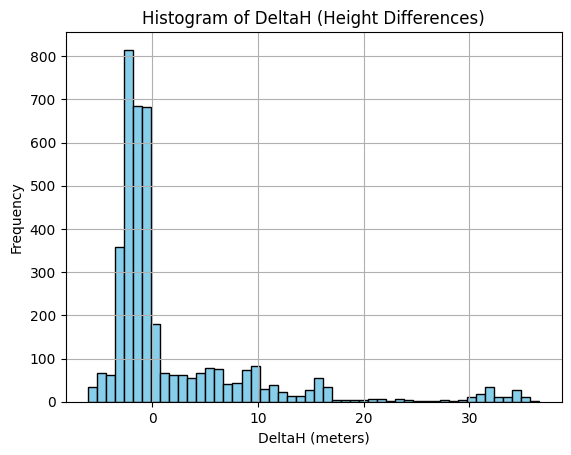

In [27]:
plt.hist(deltaH, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of DeltaH (Height Differences)")
plt.xlabel("DeltaH (meters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

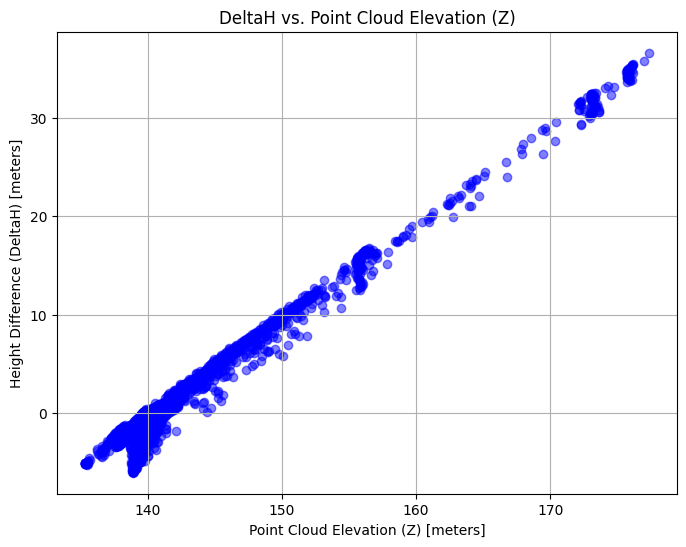

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(point_cloud_sample['Z'], deltaH, color='blue', alpha=0.5)
plt.title('DeltaH vs. Point Cloud Elevation (Z)')
plt.xlabel('Point Cloud Elevation (Z) [meters]')
plt.ylabel('Height Difference (DeltaH) [meters]')
plt.grid(True)
plt.show()